<a href="https://colab.research.google.com/github/Volt-github24/Groupe-4-info-l3-datasciences-tutoriels/blob/main/Reseaux_de_neurones_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFOL3 - SDD- UY1 - Departement d'informatique**


# **IMPLEMENTATION DU TUTORIEL SUR LES RESEAUX DE NEURONES**


                                   
### Noms des membres du groupe (**Groupe 4**) :
  1. NOUCHEN TCHAMBA Parnell Voltaire - 19M2326
  2. DJEUMEZA DONGMO Julie Merveille - 19M2105
  3. MADJOU Alvine Patricia - 19M2103
  4. NAKAM YOPDUP Manuella Kristeva - 19M2233

**Lignes de demarcation aux reseaux de neurones**

Ici, nous allons développer un réseau de neurones simple, un réseau capable de séparer deux classes, qui sont séparables par une ligne droite dans un espace de caractéristiques à 2 dimensions.

Imaginons qu'on a des objets decris par deux attributs.
un objet peut etre un fruit : "douceur" ou "aigreur" (les classes possibles).

Imaginons maintenant que nous avons deux fruits comme points dans cet espace, c'est-à-dire une orange à la position (3.5, 1.8) et un citron à (1.1, 3.9). (3.5,1.8) et (1.1,3.9) etant les attributs de ces fruits.

Nous voulons construire un separateur pour définir les points qui ressemblent le plus à du citron et ceux qui ressemblent le plus à de l'orange.

Le code suivant permet de visualiser la situation. 
La droite permettant de les separer passe par un point de coordonnees (4, 4.5)


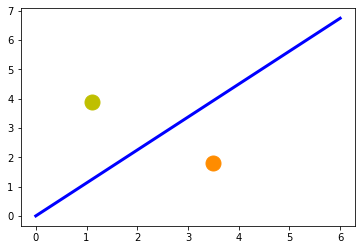

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7) # pour generer un ensemble de points sur la quelle la ligne demarcation passe 
fig, ax = plt.subplots()
ax.plot(3.5, 1.8, "or", color="darkorange", markersize=15) # Affichage du premier fruit
ax.plot(1.1, 3.9, "oy",markersize=15) # Affichage du deuxieme fruit
point_on_line = (4, 4.5)
# calculate gradient:
m = point_on_line[1] / point_on_line[0] # calcule de la pente pour tracer la droite
ax.plot(X, m * X, "b", linewidth=3)
plt.show()

Maintenant comment savoir à partir des coordonees d'un point s'il est en dessus ou en dessous de la ligne de separation ?


In [ ]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4
# check if orange is below the line,
# positive value is expected, according to the demonstrations made in the tutorial:
print(orange[0] * m - orange[1])

# check if lemon is above the line,
# negative value is expected, according to the demonstrations made in the tutorial:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


On peut donc constater que l'orange est en dessous de la ligne(car x*m - y > 0) et le citron en dessus de la ligne (car x*m - y < 0)

Nous allons charger plusieurs fruits : oranges et citrons avec un programme Python. Nous allons créer ces deux classes en
créant au hasard des points à l'intérieur d'un cercle dont le centre et le rayon sont définis. Le code Python suivant le permet.

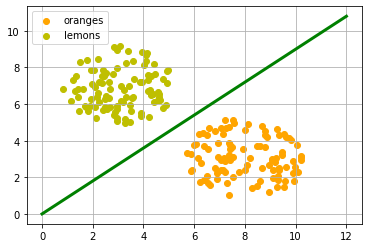

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# fonction prend en parametre un point central, le rayon de repartition, et le nombre de sample a generer
# elle retourne une liste de point (x,y)
def points_within_circle(radius, center=(0, 0), number_of_points=100):
  center_x, center_y = center
  r = radius * np.sqrt(np.random.random((number_of_points,)))
  theta = np.random.random((number_of_points,)) * 2 * np.pi
  x = center_x + r * np.cos(theta)
  y = center_y + r * np.sin(theta)
  return x, y

# ici on va donc dessiner la ligne de demarcation passant par l'origine
X = np.arange(0, 13)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(2.3, (8, 3), 100) # on genere l'ensemble des points oranges
lemons_x, lemons_y = points_within_circle(2.2, (3, 7), 100) # on genere l'ensemble des points citrons
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges") # on affiche cet ensemble de fruits orange
ax.scatter(lemons_x,lemons_y, c="y", label="lemons") # on affiche cet ensemble de fruits lemons
ax.plot(X, 0.9 * X, "g-", linewidth=3) # 0n trace la ligne de demarcation passant par l'origine
ax.legend()
ax.grid()
plt.show()

Jusqu'ici nou avons desinné de facon fixe la ligne de demarcation, maintenant trouvons comment la mettre de facon systematique, juste plus à l'oeil nu.

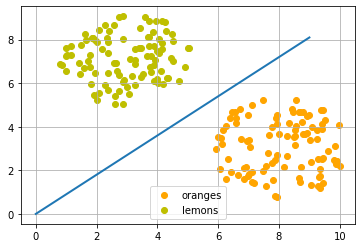

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle

X = np.arange(0, 10)
fig, ax = plt.subplots() # on creer la figure
# comme toujours on affiche d'abord les differents fruits, oranges et lemons
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges") 
ax.scatter(lemons_x,lemons_y, c="y", label="lemons")
# on constitue le tuple des coordonnes de chaque fruits avec en quelque sorte les classes qui sont soit 0(pour les oranges) ou 1(pour les lemons)
fruits = list(zip(oranges_x, oranges_y, repeat(0, len(oranges_x))))
fruits += list(zip(lemons_x, lemons_y, repeat(1, len(oranges_x))))
shuffle(fruits) # ensuite on melange, afin d'avoir un jeu de donnees melangé.

# ici, cette fonction permet d'ajuster la pente au fur et a mesure qu'on a une nouvelle donnee.
# si le point qui represente le fruit est en haut et qu'il devait etre en bas, on decremente la pente, au prealable fixee aleatoirement, et vice versa
def adjust(learning_rate=0.3, slope=0.3):
  line = None
  counter = 0
  for x, y, label in fruits:
    res = slope * x - y
    #print(label, res)
    if label == 0 and res < 0:
      # point is above line but should be below
      # => increment slope
      slope += learning_rate
      counter += 1
      # ax.plot(X, slope * X, linewidth=2, label=str(counter))
    elif label == 1 and res > 0:
      # point is below line but should be above
      # => decrement slope
      #print(res, label)
      slope -= learning_rate
      counter += 1
      ax.plot(X, slope * X, linewidth=2, label=str(counter))
  return slope

# on affiche maintenant la igne de demarcation avec la derniere oente calculee, que la fonction adjust() retourne
slope = adjust()
ax.plot(X, slope * X, linewidth=2)
ax.legend()
ax.grid()
plt.show()

Plus haut on a adapté le calcul de la ligne de demarcation, elle est ajustee a chaque nouvelle entree.

Voyons comment l'adaptation de la ligne de demarcation se fait sur les fruits lemons.

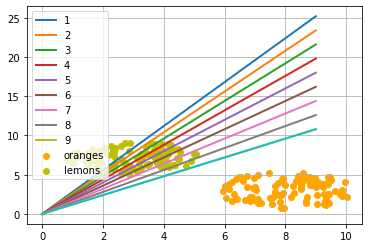

1.1999999999999995


In [ ]:
X = np.arange(0, 10)
fig, ax = plt.subplots()
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges")
ax.scatter(lemons_x, lemons_y, c="y", label="lemons")
slope = adjust(learning_rate=0.2, slope=3)
ax.plot(X, slope * X, linewidth=2)

ax.legend()
ax.grid()
plt.show()
print(slope)


On voit tres bien qu'au depart , pour le premier fruit lemon, la ligne de demarcation ne classait que ce lemon, plus on envoie des fruits (lemon), plus la pente diminue et a la fin, tous les lemons sont en haut de la ligne comme ca doit etre.

Jusqu'ici nous avons su comment separer les donnees lineairement en ajustant systematiquement la ligne de demarcation, maintenant voyons quel est le rapport avec les reseaux de neurones. Nous utiliserons le perceptron simple, juste un neuronne, avec deux entrees et une sortie
.

In [ ]:
import numpy as np

# on definit la classe qui va nous servir de perceptron
class Perceptron:
  def __init__(self, weights): # weiht contiendra la liste des poids initiaux
    """
    'weights' can be a numpy array, list or a tuple with the
    actual values of the weights. The number of input values
    is indirectly defined by the length of 'weights'
    """
    self.weights = np.array(weights) # les poids sont initialisés avec ce qui est passé en paramètre.

  # cette fonction retourne la somme des entrees ponderees
  def __call__(self, in_data):
    weighted_input = self.weights * in_data
    weighted_sum = weighted_input.sum()
    return weighted_sum

# on cree donc un perceptron
p = Perceptron(weights=[-0.45, 0.5])

for point in zip(oranges_x[:10], oranges_y[:10]):
  res = p(point) # on affecte les poids ponderes a la variable res
  print(res, end=", ") # on affiche l'ensembles des differents poids pour tous les echantillons des fruits oranges

for point in zip(lemons_x[:10], lemons_y[:10]):
  res = p(point) # on affecte les poids ponderes a la variable res
  print(res, end=", ")  # on affiche l'ensembles des differents poids pour tous les echantillons des fruits lemons

-3.149452896502102, -2.598084619865562, -2.114771388937342, -1.6944702339645472, -2.3461763984847344, -2.111795140134332, -3.0235370653980302, -0.7902860760335821, -2.0089774362027266, -1.011739837475528, 1.7062330197452271, 1.224737517606027, 2.1060440592130067, 1.7074019433547378, 1.020304357013777, 3.1151868833300593, 1.5354000773198464, 1.9749317475457067, 1.75671307472352, 2.5465544289309014, 

Ce bout de code nous affiche les differentes potentiels qui sont renvoyés au neurone pour chaque exemplaire, c'est donc normral que ce soit different car chaque echantillon a ses coordonnees (attributs) qui sont forcement different

Nous pouvons voir que nous obtenons une valeur négative, si nous entrons une orange et une valeur positive, si nous entrons un citron. On comprends que pour les fruits orange, nous avons des sorties negatives, et pour les fruits lemons nous avons des sorties positives, calculons donc la precision du reseau

In [ ]:
from collections import Counter
evaluation = Counter()
print(evaluation)
for point in zip(oranges_x, oranges_y):
  res = p(point)
  if res < 0: 
    evaluation['corrects'] += 1
  else:
    evaluation['wrongs'] += 1

for point in zip(lemons_x, lemons_y):
  res = p(point)
  if res >= 0:
    evaluation['corrects'] += 1
  else:
    evaluation['wrongs'] += 1

print(evaluation)

Counter()
Counter({'corrects': 200})


Il est donc claire que le nombre d'observations correctes soit exactement le nombre total d'observations car on a utilisé le meme jeu de donnees pour construirre le perceptron et cest avec le meme ensemble de donnees qu'on fait l'evaluation.

Cetait en fait l'autre facon de calculer la pente de la ligne de demarcation, apres demonstration on voit que la pente m est w1 / w2, donc en representant les donnees et en les separant par une droite dont la pente est w1 / w2, on aura une bonne ligne de demarcation, voyons ca :

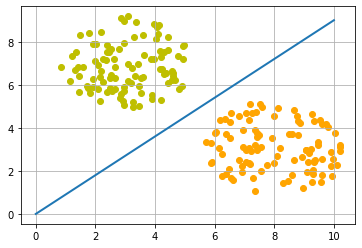

0.9


In [ ]:
import time
import matplotlib.pyplot as plt
slope = 0.1
X = np.arange(0, 11)
fig, ax = plt.subplots()
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges")
ax.scatter(lemons_x, lemons_y, c="y", label="lemons")

slope = 0.45 / 0.5 # on calcule cette pente avec la formule obtenue apres demonstration (w1/w2)

ax.plot(X, slope * X, linewidth=2)
ax.grid()
plt.show()

print(slope) # on affiche la pente

On peut donc comprendre pour le cas ou nous sommes en dimension 2, la pente de la ligne de demarcation est juste le quotient entre le poids du reseau de neurone, si on applique pas de fonction d'activations

Une autre chose à comprendre cest pourquoi les fruits oranges on une sortie negative et les fruits lemons ont une sortie positive ?
Tout simplement par ceque, d'apres ce shema, on peut remarquer que pour les fruits oranges, les valeurs de x sont tres grandes devant les valeurs de y et la valeur du premier poids est negative, les negatifs vont donc dominer sur la somme et on aura un resultat negatif (pour la sortie des exemples oranges) , et c'est exactement le meme principe pour les fruits lemons, les valeurs de y sont tres grandes devant les valeurs de x, et comme la valeur du second poids est positive, alors les positifs vont dominer dans le calcul et les exemples lemons auront des sorties positives, ainsi on parvient donc à dire que si la sortie est negative, alors le fruit est orange, sinon est lemon, et on effectue une evaluation...

Entrainement du perceptron: Ce que nous avons fait jusqu'ici n'est qu'un ajustement simple avec des meme valeurs de poids, voyons maintenant comme fonctionne l'entrainement (calcul des meilleurs valeurs des poinds après que chaque echatillon).

Divisons donc d'abord nos donnees en deux (entrainement et test). 

In [ ]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y)) # on constitue la liste des tuples pour les coordonnees de x et y des fruits oranges
lemons = list(zip(lemons_x, lemons_y)) # on constitue la liste des tuples pour les coordonnees de x et y des fruits lemons

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons, [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data) # ensuite on melange les donnees pour que la division des dnnees soit assez representative pour chaque classe
data, labels = zip(*labelled_data) # on construit les donnees non etiquetees et les etiquettes a cote

res = train_test_split(data, labels, train_size=0.8, test_size=0.2, random_state=42) # on divise les donnees (80 -20)
train_data, test_data, train_labels, test_labels = res
print(train_data[:10], "\n", train_labels[:10] ) # on affiche juste les 10 premiers pour voir s'il ya quand meme eu melange

[(4.786475634597229, 7.349065118948155), (3.898775283080321, 5.5113596339775786), (7.20116359594377, 2.3064162650983286), (4.9633676036583285, 7.866259555738008), (3.3199080545365156, 6.40272113579234), (2.1940701873305786, 6.626636526678348), (4.427058311712389, 6.087945592986557), (9.316630198479075, 2.4558268685608153), (2.5079014359706653, 7.677924558932206), (4.02492390193432, 8.144414663018944)] 
 [1, 1, 0, 1, 1, 1, 1, 0, 1, 1]


ON voit bien que le melange a ete effectif car on ne retrouve pas qu'une seule classe

Nous ne pouvons pas nous attendre à ce que le résultat soit correct car nous commencons avec des valeurs arbitraires pour les poids. Pour certains points (fruits), il peut retourner la bonne valeur, c'est-à-dire 1 pour un citron et 0 pour une orange. Dans le cas où nous obtenons un résultat erroné, nous devons corriger nos valeurs de poids, donc nous devons calculer l'erreur apres chaque entree,

In [ ]:
import numpy as np
from collections import Counter


# on definit une classe perceptron qui va contenir l'ensemble des methodes utiles
class Perceptron:

  # on attribut les valeurs en parametres aux poids et aux taux d'apprentissage
  def __init__(self,weights,learning_rate=0.1):
    """
    'weights' can be a numpy array, list or a tuple with the
    actual values of the weights. The number of input values
    is indirectly defined by the length of 'weights'
    """
    self.weights = np.array(weights)
    self.learning_rate = learning_rate

  # cette fonction permettra de calculer la classe en sorti en fontion de si l'activation est negative ou positive.
  @staticmethod
  def unit_step_function(x):
    if x < 0:
      return 0
    else:
      return 1

  # celle ci calcule la somme ponderee des entrees pour chaqu echatillon.
  def __call__(self, in_data):
    weighted_input = self.weights * in_data
    weighted_sum = weighted_input.sum()
    #print(in_data, weighted_input, weighted_sum)
    return Perceptron.unit_step_function(weighted_sum) # elle retourne donc en fait la clsse predite (0 si la sommme ponderee est negative, et 1 sinon)

  # Cette fonction ajuste les differents poids.
  def adjust(self, target_result, calculated_result, in_data):
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data)
    # on calcule l'erreur (difference entre ce qui doit etre et ce qui est predit)
    error = target_result - calculated_result

    """
    Si l'erreur est nulle, le reseau predit bien cette entre, donc pas besoin de modifier les poids
    Si l'erreur n'est donc pas nulle, on corrige les poids, avec w = w + e*xi*alpha
    """
    if error != 0:
      correction = error * in_data * self.learning_rate
      self.weights += correction
      # affichons maintenant la bonne classe, la classe predite, l'erreur l'entree, la coreection et le nouveau poids
      #print(target_result, calculated_result, error, in_data, correction, self.weights)

  # Elle prend en entree les donnees non etiquetees et les etiquettes, puis retourne un dictionnaire contenant le nombre de bonnes predictions et le nombre de mauvaises predictions
  def evaluate(self, data, labels):
    evaluation = Counter()
    for index in range(len(data)):
      label = int(round(p(data[index]),0))
      if label == labels[index]:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation


p = Perceptron(weights=[0.1, 0.1], learning_rate=0.3)

for index in range(len(train_data)):
  #on ajuste les poids au fur et a mesure
  p.adjust(train_labels[index],p(train_data[index]), train_data[index])

evaluation = p.evaluate(train_data, train_labels)
print(evaluation)
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())
print(p.weights)


Counter({'correct': 160})
[('correct', 40)]
[-3.71594308  4.93497249]


Nous avons cree un perceptron avec les poids [0.1, 0.1] et un taux d'apprentissage de 0.3, appres apprentissage on obtient les poids [-1.04638251  0.99395844], bien evidement le taux d'erreur sur les donnees d'entrainement est nul. Et heuresement egalement sur les donnees de test.

Visualisons maintenant la nouvele frontiere de decision.

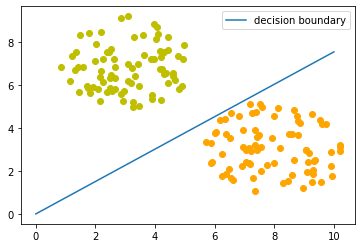

[-3.71594308  4.93497249]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X = np.arange(0, 11)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons) # on recopie les fruits par classe (d'abord les classes 1)

oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges) # on recopie les fruits par classe (ensuite les classes 2)

# visualisation
ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

# maintenant  on trace juste une droite connaisant sa pente, ayant les valeurs des poids.
w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

Tel est le separateur que le perceptron simple a produit

Voyons comment l'algorithme fonctionne

 **RESEAU DE NEURONNES SIMPLE:**

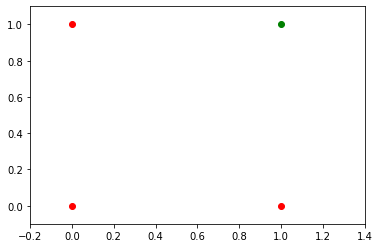

In [ ]:
# Importation des bibliotheques
import matplotlib.pyplot as plt
import numpy as np

# Generation de notre repere
fig, ax = plt.subplots()
# Generation de l'intervalle de l'axe des abscisses
xmin, xmax = -0.2, 1.4
# Organisation des valeurs de l'intervalle 
X = np.arange(xmin, xmax, 0.1)
# Generation des points constituant nos differentes classes a une certaine position dans notre repere
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
# On définit les limites de la vue sur l'axe des abscisses
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1

# Construction de notre nuage de points
plt.plot()


Dans ce bout de code, il est question de generer un repere devant contenir les nuages de points distincts, chacun devrant constituer les deux classes a separer.

[]

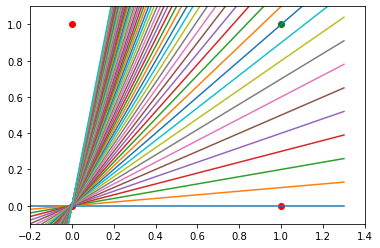

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1 # la pente fixee
# On affiche des lignes separateurs passant par l'origine avec la pente m precedente
for m in np.arange(0, 6, 0.1):
  ax.plot(X, m*X)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

Dans ce bout de code, on crée plusieurs separateurs lineaires chacun etant sous la forme y=mx . Seulement, on constate qu'aucune des lignes generees ne peut etre utilisee comme frontiere de decision car ne separant pas les elements de chacune de nos classes.

[]

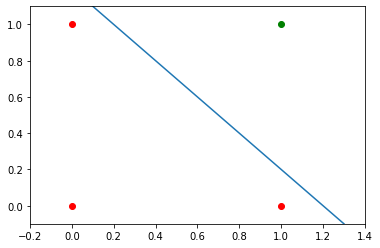

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m,c = -1,1.2
ax.plot(X, m*X+c)
plt.plot()


Ici, on a modifie le bout de code precedent celui-ci, afin de generer un bon separateur des elements de nos deux classes. 
Pour rendre ceci possible, le separateur lineaire precendent ayant la forme y=mx a ete ajuste sous forme y=mx+c ou c, l'ordonnee a l'origine est differente de 0.

In [ ]:
import numpy as np
from collections import Counter

# On cree un classe perceptron
class Perceptron:
  def __init__ (self, weigths, bias=1, learning_rate=0.3):
    # Initialisation de nos variables
    self.weights = np.array(weights)
    self.bias = bias
    self.learning_rate = learning_rate

  def unit_step_function(x):
    if x <= 0:
      return 0
    else:
      return 1

  def __call__(self, in_data):
    # On concatene le biais aux entrees(in_data)
    in_data = np.concatenate( (in_data, [self.bias]) )
    # On pondere chaque poids a l'entree correspondante
    result = self.weights @ in_data
    # Activation
    return Perceptron.unit_step_function(result)

  def adjust(self, target_result, in_data):
    # On convertit les entrees en tableau numpy si elles ne le sont pas
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data)
    # Calcul de l'erreur 
    calculated_result = self(in_data) # On conserve les labels des observations devant constituer le jeu de test
    error = target_result - calculated_result
    # Mise a jour des poids
    if error != 0:
      in_data = np.concatenate( (in_data, [self.bias]) )
      correction = error * in_data * self.learning_rate
      self.weights += correction

  def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):# Pour une obsevation dans l'ensemble des tuples,
      # On fait la prediction
      result = self(sample) 
      if result == label: # Si la prediction est bonne, on retourne correct sinon on retourne false
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation

Dans ce bout de code, il est question de definir notre pereptron ainsi que les differentes fonctions qui vont aider a sa construction. 

In [ ]:
import numpy as np
from collections import Counter
import numpy as np

# On cree un classe perceptron
class Perceptron:
  # On definit notre perceptron en initialisant ses poids, le biais et le taux d'apprentissage
  def __init__ (self, weigths, bias=1, learning_rate=0.3):
    self.weigths = np.array(weigths)
    self.bias = bias
    self.learning_rate = learning_rate

  def unit_step_function(x):
    if x <= 0:
      return 0
    else:
      return 1

  def __call__(self, in_data):
    in_data = np.concatenate( (in_data, [self.bias]) )
    result = self.weigths @ in_data
    return Perceptron.unit_step_function(result)

  def adjust(self, target_result, in_data):
    # On converti les entrees en tableau numpy si elles ne le sont pas
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data)
     
    calculated_result = self(in_data)
    error = target_result - calculated_result
    if error != 0:
      in_data = np.concatenate( (in_data, [self.bias]) )
      correction = error * in_data * self.learning_rate
      self.weigths += correction

  def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):
      # Ont fait la prediction
      result = self(sample) 
      if result == label:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation

def labelled_samples(n):
  for _ in range(n):
    # On genere un nombre entre 0 et 2 qu'on range dans une array liste de taille 2
    s = np.random.randint(0, 2, (2,))
    # Pour chaque composnte de s generee, on l'etiquete a 1 ou a 0 selon que la condition est respectee
    yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)
  
# On instancie le perceptron
p = Perceptron(weigths=[0.3, 0.3, 0.3],learning_rate=0.2)
#   
for in_data, label in labelled_samples(30):
  p.adjust(label, in_data)
  test_data, test_labels = list(zip(*labelled_samples(30)))
  evaluation = p.evaluate(test_data, test_labels)
print(evaluation)


Counter({'correct': 30})


Ici, il est question de de l'apprentissage du perceptron construit. Dans la fonction labelled_samples(), on genere des etiquettes a des observations. De cet ensemble de donnee generees, on ajuste les poids puis on evalue. On obtient 30 donnees correctement classes sur les 30 generees.

-3.0000000000000004 3.0000000000000013


[]

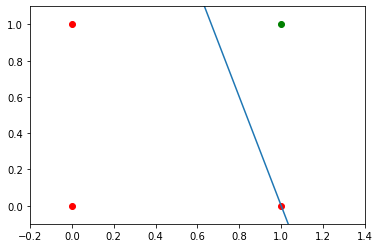

In [ ]:
import numpy as np
from collections import Counter
import numpy as np

# On cree un classe perceptron
class Perceptron:
  # On definit notre perceptron en initialisant ses poids, le biais et le taux d'apprentissage
  def __init__ (self, weigths, bias=1, learning_rate=0.3):
    self.weigths = np.array(weigths)
    self.bias = bias
    self.learning_rate = learning_rate

  def unit_step_function(x):
    if x <= 0:
      return 0
    else:
      return 1

  def __call__(self, in_data):
    in_data = np.concatenate( (in_data, [self.bias]) )
    result = self.weigths @ in_data
    return Perceptron.unit_step_function(result)

  def adjust(self, target_result, in_data):
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data) 
    calculated_result = self(in_data)
    error = target_result - calculated_result
    if error != 0:
      in_data = np.concatenate( (in_data, [self.bias]) )
      correction = error * in_data * self.learning_rate
      self.weigths += correction

  def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):
      # Ont fait la prediction
      result = self(sample) 
      if result == label:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
# On ajuste la pente 
m = -p.weigths[0] / p.weigths[1]
# On ajuste l'intercept c
c = -p.weigths[2] / p.weigths[1]
print(m, c)
ax.plot(X, m*X+c)
plt.plot()

Dans ce bout de code, on entraine notre perceptron (a deux entrees plus un biais et a une sortie) a separer les donnees non pas de facon analogue mais de maniere semantique. A partir de la nouvelle equation du perceptron (avec en ajout un biais), la pente et la constante c (intercept) on a genere un separateur lineaire pour nos donnees.

In [ ]:
# Importation du module qui va aider a generer les elements de nos classes
from sklearn.datasets import make_blobs

n_samples = 250 #Nombre d'echantillons 
# Generation pour chacune des classes, les echantillons et labels associes ainsi que leur centre
samples, labels = make_blobs(n_samples, centers=([2.5, 3], [6.7, 7.9]), random_state=0)

Dans ce bout de code, il est question de créer un autre exemple avec des ensembles de données qui sera soumis a notre perceptron pour un test. La fonction make_blobs de sklearn.datasets ainsi utilisee va permettre de générer des blobs gaussiens isotropes pour la classification.



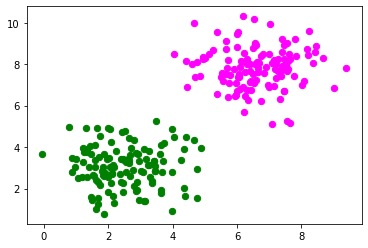

In [ ]:
import matplotlib.pyplot as plt

colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()

for n_class in range(2):
  ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], c=colours[n_class], s=40, label=str(n_class))

Dans cette partie, il est question de visualiser les donnees generees dans le bout de code precedent celui-ci

In [ ]:
import numpy as np
from collections import Counter
import numpy as np

# On cree un classe perceptron
class Perceptron:
  # On definit notre perceptron en initialisant ses poids, le biais et le taux d'apprentissage
  def __init__ (self, weigths, bias=1, learning_rate=0.3):
    self.weigths = np.array(weigths)
    self.bias = bias
    self.learning_rate = learning_rate

  def unit_step_function(x):
    if x <= 0:
      return 0
    else:
      return 1

  def __call__(self, in_data):
    in_data = np.concatenate( (in_data, [self.bias]) )
    result = self.weigths @ in_data
    return Perceptron.unit_step_function(result)

  def adjust(self, target_result, in_data):
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data) 
    calculated_result = self(in_data)
    error = target_result - calculated_result
    if error != 0:
      in_data = np.concatenate( (in_data, [self.bias]) )
      correction = error * in_data * self.learning_rate
      self.weigths += correction

  def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):
      # Ont fait la prediction
      result = self(sample) 
      if result == label:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation

# Methode d'evaluation du perceptron 
n_learn_data = int(n_samples * 0.8) # On extrait 80% des points de donnees generes
learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]

p = Perceptron(weigths=[0.3, 0.3, 0.3],
learning_rate=0.8)
for sample, label in zip(learn_data, learn_labels):
  p.adjust(label, sample)
  evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)

Counter({'correct': 200})


Dans cette, partie on evalue les donnees qui ont prealablement ete generees puis on retourne le nombre d'observations qui ont ete bien classees (Soit 200 observations bien classees).

-1.5513529034664024 11.736643489707035


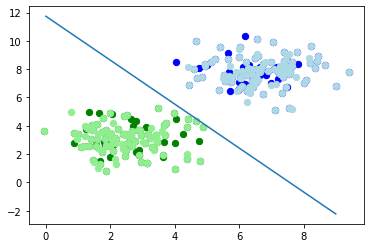

In [ ]:
import numpy as np
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# On cree un classe perceptron
class Perceptron:
  # On definit notre perceptron en initialisant ses poids, le biais et le taux d'apprentissage
  def __init__ (self, weigths, bias=1, learning_rate=0.3):
    self.weigths = np.array(weigths)
    self.bias = bias
    self.learning_rate = learning_rate

  def unit_step_function(x):
    if x <= 0:
      return 0
    else:
      return 1

  def __call__(self, in_data):
    in_data = np.concatenate( (in_data, [self.bias]) )
    result = self.weigths @ in_data
    return Perceptron.unit_step_function(result)

  def adjust(self, target_result, in_data):
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data) 
    calculated_result = self(in_data)
    error = target_result - calculated_result
    if error != 0:
      in_data = np.concatenate( (in_data, [self.bias]) )
      correction = error * in_data * self.learning_rate
      self.weigths += correction

  def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):
      # Ont fait la prediction
      result = self(sample) 
      if result == label:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation

# Construction des donnees d'apprentissage
fig, ax = plt.subplots()
colours = ('green', 'blue') # Couleur des observations de chacune des classes pour le jeu d'apprentissage
for n_class in range(2):
  ax.scatter(learn_data[learn_labels==n_class][:, 0], learn_data[learn_labels==n_class][:, 1],
            c=colours[n_class], s=40, label=str(n_class))

# Construction des donnees de test
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
  ax.scatter(test_data[test_labels==n_class][:, 0], test_data[test_labels==n_class][:, 1], 
             c=colours[n_class], s=40, label=str(n_class))

# Construction du separateur 
X = np.arange(np.max(samples[:,0]))
m = -p.weigths[0] / p.weigths[1]
c = -p.weigths[2] / p.weigths[1]
print(m, c)
ax.plot(X, m * X + c ) 
plt.plot()
plt.show()  


Une fois qu'on a evalue les donnees generees et qu'on est rassure que notre modele append bien, place a la visualisation. Ainsi, dans ce bout de code, il est question de visualiser la separation de nos deux classes sur les donnees d'apprentissage et de test generees.

In [ ]:
import numpy as np
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# On cree un classe perceptron
class Perceptron:
  # On definit notre perceptron en initialisant ses poids, le biais et le taux d'apprentissage
  def __init__ (self, weigths, bias=1, learning_rate=0.3):
    self.weigths = np.array(weigths)
    self.bias = bias
    self.learning_rate = learning_rate

  def unit_step_function(x):
    if x <= 0:
      return 0
    else:
      return 1

  def __call__(self, in_data):
    in_data = np.concatenate( (in_data, [self.bias]) )
    result = self.weigths @ in_data
    return Perceptron.unit_step_function(result)

  def adjust(self, target_result, in_data):
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data) 
    calculated_result = self(in_data)
    error = target_result - calculated_result
    if error != 0:
      in_data = np.concatenate( (in_data, [self.bias]) )
      correction = error * in_data * self.learning_rate
      self.weigths += correction

  def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):
      # Ont fait la prediction
      result = self(sample) 
      if result == label:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation
# On instancie notre perceptron
p = Perceptron(weigths=[0.3, 0.3, 0.3],
bias=1,
learning_rate=0.2)

#  On etiquettes les donnes de test puis on passe a evaluation et on genere les donnees correctement predites et celles ne l'etant pas
def labelled_samples(n):
  # On genere des etiquettes a nos donnees de test
  for _ in range(n):
    s = np.random.random((2,))
    # on classe les ponts selon qu'ils respectent la condition donnee
    yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)
for in_data, label in labelled_samples(30): # Pour chaque tuple dans l'ensemble de tuples precedemment etiquetes,
  p.adjust(label, in_data) #On ajuste les poids
test_data, test_labels = list(zip(*labelled_samples(60))) # Nos donnees de tests et leurs etiquettes associees deviennent les 60 premieres observations de l'ensembles des tuples prealablement etiquettes
evaluation = p.evaluate(test_data, test_labels) # on evalue les 60 tuples generees
print(evaluation) # on affiche le resultat

Counter({'correct': 49, 'wrong': 11})


Dans ce bout de code il est question de l'apprentissage du perceptron.
Dans la fonction labelled_samples(), on genere des etiquettes a des observations (Un point sera de classe 1 si la premiere operande ou la deuxieme est superiere ou egale a 0.5, il sera de classe 0 sinon). De cet ensemble de donnee generees et etiquettees, on ajuste les poids puis on evalue. On obtient 49 donnees correctement classes et 11 incorrectement classees sur les 60 generees.
Notre perceptron n'apprend donc pas correctement.

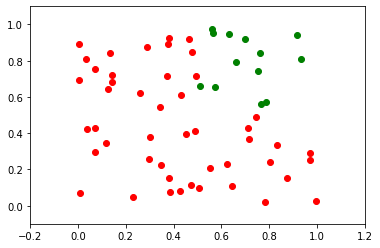

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# On cree un classe perceptron
class Perceptron:
  # On definit notre perceptron en initialisant ses poids, le biais et le taux d'apprentissage
  def __init__ (self, weights, bias=1, learning_rate=0.3):
    self.weights = np.array(weights)
    self.bias = bias
    self.learning_rate = learning_rate

  def unit_step_function(x):
    if x <= 0:
      return 0
    else:
      return 1

  def __call__(self, in_data):
    in_data = np.concatenate( (in_data, [self.bias]) )
    result = self.weights @ in_data
    return Perceptron.unit_step_function(result)

  def adjust(self, target_result, in_data):
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data) 
    calculated_result = self(in_data)
    error = target_result - calculated_result
    if error != 0:
      in_data = np.concatenate( (in_data, [self.bias]) )
      correction = error * in_data * self.learning_rate
      self.weights += correction

  def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):
      # Ont fait la prediction
      result = self(sample) 
      if result == label:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation

p = Perceptron(weights=[0.3, 0.3, 0.3], learning_rate=0.4)

def labelled_samples(n):
  for _ in range(n):
    s = np.random.random((2,))
    yield (s, 0) if s[0] < 0.5 else (s, 1)

p = Perceptron(weights=[0.3, 0.3, 0.3],
learning_rate=0.4)
for in_data, label in labelled_samples(300):
  p.adjust(label, in_data)
test_data, test_labels = list(zip(*labelled_samples(500)))
print(p.weights)
p.evaluate(test_data, test_labels)

[ 2.08919272 -0.39189358 -0.9       ]


Counter({'correct': 467, 'wrong': 33})

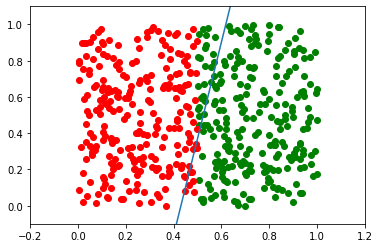

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

 **STRUCTURE,POIDS ET MATRICES DANS LES RESEAUX DE NEURONES**

In [ ]:
import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


Ici il etait question de definir le vecteur d'entree de notre reseau de neurones. Dans notre cas il possede 3 entrees

In [ ]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)
print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


Il est ensuite question de le transposer car dans nos futurs algorithmes on utilise les vecteurs colonnes en entrees

In [ ]:
import numpy as np
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# Les valeurs sont comprises dans l'intervalle  [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


Il etait question ici de creer 1200 observations compris entre 0 et 1 de maniere aleatoire

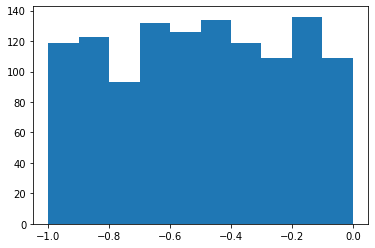

In [ ]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

Atravers cet histogramme on constate que les observations crees de manieres aleatoires sont suffisamment representatives de l'espace et ceci grace a l a fonction np.random.uniform

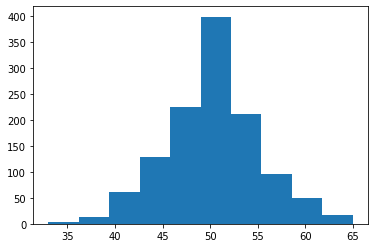

In [ ]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

Ici les observations suivent une loi binomiale car on a utiliser la fonction numpy binomiale.

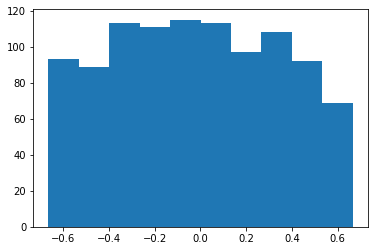

In [ ]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()

Ici on a utilise la forme normale de troncature cependant pour faciliter la tache on va creer une fonction de troncature qui sera utiliser par la suite:

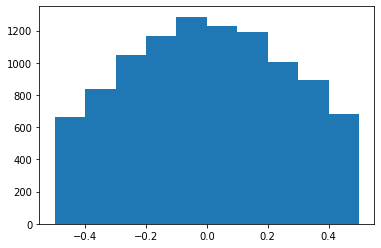

In [ ]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()

on obtient l'histogramme de repartition des observations obtenue grace a nouvelle fonction

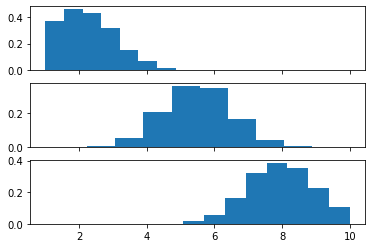

In [ ]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()

Ici il s'agit de tester notre fonction plusieurs fois avec des parametres difeerents 

In [ ]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[-0.49530865, -0.07188958,  0.53029176],
       [ 0.50047848,  0.15864064,  0.42637876],
       [ 0.26860798, -0.24486715, -0.01211296],
       [-0.11832508,  0.22343695,  0.37515446]])

Sachant que les precedentes fonctions avaient pour but de choisir la meilleure methode pour choisir les poids caches, c'est notre fonction "truncated _normal" qui sera finalement utilisee. 
c'est donc elle qui est appliquee pour trouver sous forme de matrice le poids que chaque neurones d'entrees(3) sur tous les neurones de la couche cachee(4) 

In [ ]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[ 0.35092473,  0.15462052, -0.41185323, -0.29060066],
       [ 0.1277327 ,  0.35344241, -0.45910161,  0.3680645 ]])

on obtient comme precedemment la matrice des poids sachant qu'on a 4 neurone dans la couche cachees et 2 neurones en sorties. 

In [ ]:
import numpy as np
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
  def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.create_weight_matrices()
  def create_weight_matrices(self):
    rad = 1 / np.sqrt(self.no_of_in_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))
  def train(self):
    pass
  def run(self):
    pass

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes = 3,no_of_out_nodes = 2,no_of_hidden_nodes = 4,learning_rate = 0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)
                               

[[-0.55248043 -0.27696437  0.07325088]
 [ 0.39054182 -0.1072651   0.20389932]
 [-0.39998726  0.43447103  0.32252768]
 [-0.15729153  0.14079133  0.15216343]]
[[ 0.28624524 -0.03847734 -0.20558466  0.43152445]
 [-0.01409358  0.0012022   0.02265663  0.35699835]]


Il etait question d'ecrire la fonction qui permet de representer le fonctionnement d'un reseau de neurones.
Elle est ensuite executer et on obtient les matrices des poids d'entree au niveau de la couche cachee et et a la sortie des neurones de la couche cachee 

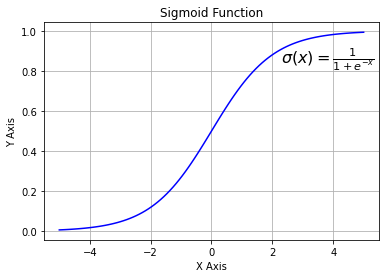

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
  return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

il s'agit la courbe de la fonction sigmoide

In [ ]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


La fonction scipy.special est une implementation de la fonction sigmoide.

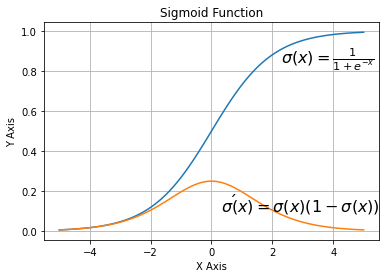

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
  return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)
plt.show()

Representation de la fonction sigmoide et de sa derivee

In [ ]:
@np.vectorize
def sigmoid(x):
  return 1 / (1 + np.e ** -x)
#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

Ici nous avons defini notre propre fonction sigmoide a l'aide du vecteur decorateur de numpy

In [ ]:
def ReLU(x):
  return np.maximum(0.0, x)
def ReLU_derivation(x):
  if x <= 0:
    return 0
  else:
    return 1

Ici on definit une autre fonction d'activation:RELU(Rectified Linear Unit)

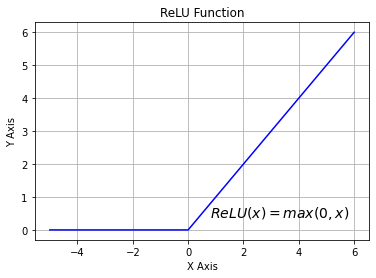

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

On trace la courbe de la fonction RelU

In [ ]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
  def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.create_weight_matrices()
  """ Initialiser les poids de la matrice du reseau de neurone"""  
  def create_weight_matrices(self):
    rad = 1 / np.sqrt(self.no_of_in_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))
  def train(self, input_vector, target_vector):
    pass
  
  #Executer le reseau de neurones de neurones avec pour parametres d'entree notre vecteur d'entree  
  def run(self, input_vector):
  # Faire la transposee de notre vecteur d'entree
    input_vector = np.array(input_vector, ndmin=2).T
    input_hidden = activation_function(self.weights_in_hidden @ input_vector)
    output_vector = activation_function(self.weights_hidden_out @ input_hidden)
    return output_vector

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes=2,
no_of_out_nodes=2,
no_of_hidden_nodes=4,
learning_rate=0.6)

In [ ]:
simple_network.run([(3, 4)])

array([[0.51986662],
       [0.57161503]])

Cette succession de code avait pour but d'ecrire et d'executer la fonction permettant de representer le reseau de neurones ceci en utilisant la fonction d'activation de scipy.special

**ENTRAINEMENT** **D**'**UN** **RESEAU** **DE** **NEURONE** **AVEC** **PYTHON**

In [ ]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:

  #On cree le reseau de neurone en definissant son nombres de neurones en entrée , son nombre de neurone en sortie , son nombre de neurone dans la couche cachée et son taux d'apprentissage
  def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.create_weight_matrices()

  # Methode qui initialise les poids du reseau de neurone  
  def create_weight_matrices(self):
    rad = 1 / np.sqrt(self.no_of_in_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))

  # Methode qui fait l'entrainement du reseau de neurone en faisant le calcul des erreurs et l'ajustement des differents poids 
  def train(self, input_vector, target_vector):
    # On se rassure que les vecteurs input_vector et target_vector ont la bonne forme
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)
    target_vector = np.array(target_vector).reshape(target_vector.size, 1)

    output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
    output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
    output_error = target_vector - output_vector_network
    tmp = output_error * output_vector_network * (1.0 - output_vector_network)
    self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)

    # On calcule l'erreur
    hidden_errors = self.weights_hidden_out.T @ output_error

    # On met à jour les poids initialisés plus haut
    tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
    self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)

  #Methode qui genere la valeur en sortie du reseau de neurone  ayant  un vecteur de valeur en entrée 
  def run(self, input_vector):
  
    # On se rassure que le vecteur en entrée soit un vecteur colonne:
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)

    input4hidden = activation_function(self.weights_in_hidden@ input_vector)
    output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
    return output_vector_network

  # Methode d'evaluation du reseau de neurone en retournant le nombre d'observation qu'il a correctement classé et le nombre d'observation qu'il n'a pas correctement classé
  def evaluate(self, data, labels):
    
    corrects, wrongs = 0, 0
    for i in range(len(data)):
      res = self.run(data[i])
      res_max = res.argmax()
      if res_max == labels[i].argmax():
        corrects += 1
      else:
        wrongs += 1
    return corrects, wrongs



Ce code python contient la definition d'un reseau de neurone et les differentes methodes(run,evaluate,create_weight_matrices,train) permettant d'y effectuer toutes les operations necessaires pour mener à bien sa construction.
Ce code nous sera utile dans des codes plus bas pour la formation de notre reseau de neurone

In [ ]:
# On génère un jeu de donnée de 500 observations divisé en 3 groupes , chaque groupe correspondant à une classe 
from sklearn.datasets import make_blobs
n_samples = 500
blob_centers = ([2, 6], [6, 2], [7, 7])
n_classes = len(blob_centers)
data, labels = make_blobs(n_samples=n_samples,centers=blob_centers,random_state=7)


Ce bout de code ci dessus nous permet d'avoir un jeu de donnée d'entrainement et de test qui seront soumis à notre reseau de neurone pour test .

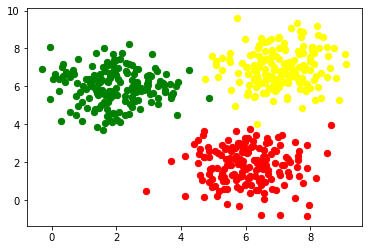

In [ ]:
# Visualisation du jeu de donnée généré

import matplotlib.pyplot as plt
colours = ('green', 'red', "yellow")
fig, ax = plt.subplots()
for n_class in range(n_classes):
  ax.scatter(data[labels==n_class][:, 0],
             data[labels==n_class][:, 1],
             c=colours[n_class],
             s=40,
             label=str(n_class))

In [ ]:
labels[:7]

array([2, 2, 1, 0, 2, 0, 1])

Cette ligne de code nous permet de voir les classes des 7 premières 
observations. On remarque donc que les classes sont representées dans un vecteur à une dimension.
Ce qui n'est pas une bonne representation

In [ ]:
import numpy as np

# On applique la methode du one-hot representation 
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float)

labels[:7] # On reaffiche les classes des 7 premieres observations du jeu de donnee qui cette fois seront chacune represntés par un vecteur à 3 dimensions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Le code ci-dessus vient ainsi pallier au problème de representation des classes du code qui précède en utilisant la methode du one-hot representation pour chaque classe. De ce fait chaque classe est donc representé par un vecteur de 3 dimensions (avec un element à 1 et le reste à 0) vue qu'on a 3 classes

In [ ]:
from sklearn.model_selection import train_test_split

res = train_test_split(data, labels,train_size=0.8,test_size=0.2,random_state=42) # Division du jeu de donnée en 2 : 80% pour l'entrainement et 20% pour le test
train_data, test_data, train_labels, test_labels = res
train_labels[:10] # On affiche les classes des 10 premières observations du jeu d'entrainement

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

Avec le code ci-dessus nous divisions notre jeu de donnée en 2: le jeu d'entrainement qui represente 80% du jeu de donnée initial et le jeu de test qui lui represente 20%

In [ ]:
# On cree un reseau de neurone avec 2 neurones en entrée , 3 en sortie ,5 dans la couche cachée et ayant un taux d'apprentissage de 0.3 ceci en se servant de la classe neuralNetwork

simple_network = NeuralNetwork(no_of_in_nodes=2,
                               no_of_out_nodes=3,
                               no_of_hidden_nodes=5,
                               learning_rate=0.3)

#On soumet donc ce reseau de neurone à l'apprentissage avec le jeu de donnée généré plus haut
for i in range(len(train_data)):
  simple_network.train(train_data[i], train_labels[i])

#On passe à l'evaluation du reseau de neurone
simple_network.evaluate(train_data, train_labels)

(391, 9)

In [ ]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:

  #On cree le reseau de neurone en definissant son nombres de neurones en entrée , son nombre de neurone en sortie , son nombre de neurone dans la couche cachée , son taux d'apprentissage et cette fois en tenant compte d'eventuels noeuds biais
  def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate,bias=None):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.bias = bias
    self.create_weight_matrices()

  # Methode qui initialise les poids du reseau de neurone en tenant compte d'un eventuel noeud biais
  def create_weight_matrices(self):
    bias_node = 1 if self.bias else 0
    rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes + bias_node))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes + bias_node))

  def train(self, input_vector, target_vector):
    # On s'assure que les vecteurs ont la forme correcte
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)
    if self.bias:
      # s'il y'a un noeud biais on l'ajoute à la fin du vecteur d'entré
      input_vector = np.concatenate( (input_vector, [[self.bias]]) )
    target_vector = np.array(target_vector).reshape(target_vector.size, 1)
    output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
    if self.bias:
      # s'il y'a un noeud biais on l'ajoute à la fin du vecteur de la couche cachée
      output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
    output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
    output_error = target_vector - output_vector_network
    # Mise à jour des poids:
    tmp = output_error * output_vector_network * (1.0 - output_vector_network)
    self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
    # Calcul de l'erreur
    hidden_errors = self.weights_hidden_out.T @ output_error
    # Mise à jour des poids
    tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
    if self.bias:
      x = (tmp @input_vector.T)[:-1,:]  
    else:
      x = tmp @ input_vector.T
    self.weights_in_hidden += self.learning_rate * x

  #Methode qui genere la valeur en sortie du reseau de neurone  ayant  un vecteur de valeur en entrée prenant n compte la presence d'eventuel noeud biais
  def run(self, input_vector):
    # On s'assure que le vecteur d'entrée soit un vecteur colonne
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)
    if self.bias:
      # s'il y'a un noeud biais on l'ajoute à la fin du vecteur d'entré
      input_vector = np.concatenate( (input_vector, [[1]]) )
    input4hidden = activation_function(self.weights_in_hidden @ input_vector)
    if self.bias:
      input4hidden = np.concatenate( (input4hidden, [[1]]) )
    output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
    return output_vector_network               

  # Methode d'evaluation du reseau de neurone en retournant le nombre d'observation qu'il a correctement classé et le nombre d'observation qu'il n'a pas correctement classé
  def evaluate(self, data, labels):
    corrects, wrongs = 0, 0
    for i in range(len(data)):
      res = self.run(data[i])
      res_max = res.argmax()
      if res_max == labels[i].argmax():
        corrects += 1
      else:
        wrongs += 1
    return corrects, wrongs



Ce code python contient la definition d'un reseau de neurone et les differentes methodes(run,evaluate,create_weight_matrices,train) permettant d'y effectuer toutes les operations necessaires pour mener à bien sa construction avec la particularité de prendre en consideration  le cas de presence de noeud biais.
Ce code nous sera utile pour la formation du reseau de neurone  dans le code qui suit

In [ ]:
# On cree un reseau de neurone avec 2 neurones en entrée , 3 en sortie ,5 dans la couche cachée et ayant un taux d'apprentissage de 0.1 avec la presence d'un noeud biais ceci à l'aide du fichier neural_networks2.py 
simple_network = NeuralNetwork(no_of_in_nodes=2,
                no_of_out_nodes=3,
                no_of_hidden_nodes=5,
                learning_rate=0.1,
                bias=1)

#On soumet donc ce reseau de neurone à l'apprentissage avec le jeu de donnée généré plus haut
for i in range(len(train_data)):
  simple_network.train(train_data[i], train_labels[i])

#On passe à l'evaluation du reseau de neurone  
simple_network.evaluate(train_data, train_labels)

(361, 39)

**FONCTION** **D**'**ACTIVATION** **SOFTMAX**

In [ ]:
#  Definition de la fonction softmax
import numpy as np
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

#Application de la foncion softmax à x
x = np.array([1, 0, 3, 5])
y = softmax(x)
y, x / x.sum()

(array([0.01578405, 0.00580663, 0.11662925, 0.86178007]),
 array([0.11111111, 0.        , 0.33333333, 0.55555556]))

In [ ]:
import numpy as np
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
softmax(x)

array([0.01578405, 0.00580663, 0.11662925, 0.86178007])

In [ ]:
#  Calcul de la derivé de la fonction softmax

import numpy as np
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

s = softmax(np.array([0, 4, 5]))

si_sj = - s * s.reshape(3, 1)
print(s)
print(si_sj)
s_der = np.diag(s) + si_sj
s_der

[0.00490169 0.26762315 0.72747516]
[[-2.40265555e-05 -1.31180548e-03 -3.56585701e-03]
 [-1.31180548e-03 -7.16221526e-02 -1.94689196e-01]
 [-3.56585701e-03 -1.94689196e-01 -5.29220104e-01]]


array([[ 0.00487766, -0.00131181, -0.00356586],
       [-0.00131181,  0.196001  , -0.1946892 ],
       [-0.00356586, -0.1946892 ,  0.19825505]])

In [ ]:
import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

#fonction d'activation sigmoid
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

#fonction d'activation softmax
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()


class NeuralNetwork:
    #On cree le reseau de neurone en definissant son nombres de neurones en entrée , son nombre de neurone en sortie , son nombre de neurone dans la couche cachée , son taux d'apprentissage et qui utilise commee fonction d'activation la fonction softmax ou pas
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate,softmax=True):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.softmax = softmax
        self.create_weight_matrices()
    
    # Methode qui initialise les poids du reseau de neurone 
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))
        
    # Methode qui fait l'entrainement du reseau de neurone en faisant le calcul des erreurs et l'ajustement des differents poids ceci en utilisant une fonction d'activation qui sera soit sigmoid soit softmax 
    def train(self, input_vector, target_vector):
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)
        output_vector_hidden = sigmoid(self.weights_in_hidden @ input_vector)
        if self.softmax: # utilisation de la fonction d'activation softmax
            output_vector_network = softmax(self.weights_hidden_out @ output_vector_hidden)
        else:            # utilisation de la fonction d'activation sigmoid
            output_vector_network = sigmoid(self.weights_hidden_out @ output_vector_hidden)
        output_error = target_vector - output_vector_network
        if self.softmax:
            ovn = output_vector_network.reshape(output_vector_network.size,)
            si_sj = - ovn * ovn.reshape(self.no_of_out_nodes, 1)
            s_der = np.diag(ovn) + si_sj
            tmp = s_der @ output_error
            self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        else:
            tmp = output_error * output_vector_network * (1.0 - output_vector_network)
            self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        # calcul de l'erreur
        hidden_errors = self.weights_hidden_out.T @ output_error
        # mise à jour des poids
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)
    
    #Methode qui genere la valeur en sortie du reseau de neurone  ayant  un vecteur de valeur en entrée en utilisant biensur une fonction d'activation(softmax ou sigmoid)
    def run(self, input_vector):
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        input4hidden = sigmoid(self.weights_in_hidden @ input_vector)
        if self.softmax: # utilisation de la fonction d'activation softmax
            output_vector_network = softmax(self.weights_hidden_out @ input4hidden)
        else: # utilisation de la fonction d'activation sigmoid
            output_vector_network = sigmoid(self.weights_hidden_out @ input4hidden)
        return output_vector_network
    
    # Methode d'evaluation du reseau de neurone en retournant le nombre d'observation qu'il a correctement classé et le nombre d'observation qu'il n'a pas correctement classé
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

Ce code python contient la definition d'un reseau de neurone avec ses differents paramètres; et les differentes methodes(run,evaluate,create_weight_matrices,train) permettant d'y effectuer toutes les operations necessaires pour mener à bien sa construction avec l'utilisation d'une fonction d'activation qui peut etre la fonction softmax ou sigmoid.
Ce code nous sera utile pour la formation du reseau de neurone  dans le code qui suit

In [ ]:

# On génère un jeu de donnée de 300 observations divisé en 2 groupes , chaque groupe correspondant à une classe 

from sklearn.datasets import make_blobs
n_samples = 300
samples, labels = make_blobs(n_samples=n_samples,centers=([2, 6], [6, 2]),random_state=0)

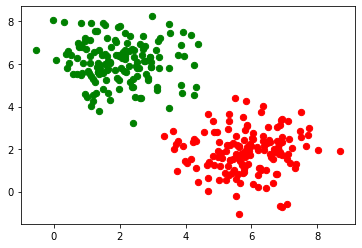

In [ ]:
# Visualisation du jeu de donnée

import matplotlib.pyplot as plt
colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1],c=colours[n_class], s=40, label=str(n_class))


In [ ]:

# Division du jeu de donnée en 2 : 80% pour l'entrainement et 20% pour le test    
size_of_learn_sample = int(n_samples * 0.8)
learn_data = samples[:size_of_learn_sample] # jeu d'entrainement 
test_data = samples[-size_of_learn_sample:] # jeu de test

In [ ]:


# On cree un reseau de neurone avec 2 neurones en entrée , 3 en sortie ,5 dans la couche cachée et ayant un taux d'apprentissage de 0.3 et qui utilise la fonction d'activation softmax

simple_network = NeuralNetwork(no_of_in_nodes=2,
                                no_of_out_nodes=2,
                                no_of_hidden_nodes=5,
                                learning_rate=0.3,
                                softmax=True)

In [ ]:
#  On genere les valeurs en sortie du reseau de neurone ayant des vecteurs en entrée à l'aide de la méthode run
for x in [(1, 4), (2, 6), (3, 3), (6, 2)]:
    y = simple_network.run(x)
    print(x, y, s.sum())

(1, 4) [[0.5449721]
 [0.4550279]] 1.0
(2, 6) [[0.53988599]
 [0.46011401]] 1.0
(3, 3) [[0.57446416]
 [0.42553584]] 1.0
(6, 2) [[0.62076983]
 [0.37923017]] 1.0


In [ ]:
#On change la representation des classes à l'aide de la methode du one-hot-encoding afin qu'elles soient representées par un vecteur à 2 dimensions(le jeu de donnée ayant 2 classes) 
labels_one_hot = (np.arange(2) == labels.reshape(labels.size, 1))
labels_one_hot = labels_one_hot.astype(np.float)

# Phase d'entrainement du resequ de neurone
for i in range(size_of_learn_sample):
    #print(learn_data[i], labels[i], labels_one_hot[i])
    simple_network.train(learn_data[i],labels_one_hot[i])
    
# On evalue le reseau de neurone en ressortant le nombre d'observation bien classé et mal classé    
from collections import Counter
evaluation = Counter()
simple_network.evaluate(learn_data, labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


(236, 4)

**MATRICE** **DE** **CONFUSION**

In [ ]:
# matrice de confusion

import numpy as np
cm = np.array(
[[5825,    1,   49,   23,    7,   46,   30,   12,   21,  26],
[    1, 6654,   48,   25,   10,   32,   19,   62,  111,  10],
[    2,   20, 5561,   69,   13,   10,    2,   45,   18,   2],
[    6,   26,   99, 5786,    5,  111,    1,   41,  110,  79],
[    4,   10,   43,    6, 5533,   32,   11,   53,   34,  79],
[    3,    1,    2,   56,    0, 4954,   23,    0,   12,   5],
[   31,    4,   42,   22,   45,  103, 5806,    3,   34,   3],
[    0,    4,   30,   29,    5,    6,    0, 5817,    2,   28],
[   35,    6,   63,   58,    8,   59,   26,   13, 5394,   24],
[   16,   16,   21,   57,  216,   68,    0,  219,  115, 5693]])

Le code ci-dessus permet de representer une matrice de confusion d'un probleme de classification multiclasse contenant 10 labels ou classes

In [ ]:
# Calcul de la precision d'une classe dans la matrice de confusion en faisant le ratio entre le nombre d'element qui ont ete bien classé et la somme des eleements de sa colonne
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()

# Calcul du rappel total d'une classe dans la matrice de confusion en faisant le ratio entre le nombre d'element qui ont ete bien classé et la somme des eleements de sa ligne
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

# Calcul de la precision totale de l'ensmble du modèle en faisant la moyenne des precisions de toutes les classes du modèle
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

# Calcul de la rappel de l'ensmble du modèle en faisant la moyenne des rappels de toutes les classes du modèle
def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [ ]:
# On affiche le rappel et la precision de chacune des classes du modèle dont la matrice de confusion a  été representée plus haut 
print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label,cm):6.3f}")

label precision recall
    0     0.983  0.964
    1     0.987  0.954
    2     0.933  0.968
    3     0.944  0.924
    4     0.947  0.953
    5     0.914  0.980
    6     0.981  0.953
    7     0.928  0.982
    8     0.922  0.949
    9     0.957  0.887


In [ ]:
#On affiche la precision et le rappel total du modèle
print("precision total:", precision_macro_average(cm))
print("recall total:", recall_macro_average(cm))

precision total: 0.9496885564052286
recall total: 0.9514531547877969


In [ ]:
# Calcul du taux de generalisation en faisant le ratio entre la somme des elements de la diagonale de la matrice de confusion et la somme de tout les elements de la matrice de confusion 
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

# On affiche le taux de generalisation du modele
accuracy(cm)

0.9503833333333334

**RESEAU DE NEURONES A PLUSIEURS COUCHES CACHEES**

In [ ]:
import numpy as np
from scipy.stats import truncnorm

# on definit la fonction sigmoid qui sera usee comme fonction d'activation
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid


def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd(upp - mean) / sd, loc=mean, scale=sd)

# on definit notre reseau de neurones ainsi que les finctions qui serviront a le manipuler
class NeuralNetwork:
    
    def __init__(self, no_of_in_nodes, no_of_out_nodes, no_of_hidden_nodes, learning_rate, bias=None):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()
    
    # On initialise les matrices de poids du réseau neuronal avec des nœuds de biais facultatifs
    def create_weight_matrices(self):
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, self.no_of_hidden_nodes + bias_node))

    
    # On definit la methode d'entrainement de notre neurones
    def train(self, input_vector, target_vector):
        bias_node = 1 if self.bias else 0
        if self.bias:
        # On ajoute le noeud biais au vecteur d'entreea
            input_vector = np.concatenate((input_vector, [self.bias]) )
        
        # On se rassure que les vecteurs d'entree et ceux en attendus soient sous la meme forme
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.wih, input_vector)
        output_hidden = activation_function(output_vector1)
            
        if self.bias:
            # On ajoute un biais a la sortie de la couche cachee
            output_hidden = np.concatenate((output_hidden, [[self.bias]]) )
        
        output_vector2 = np.dot(self.who, output_hidden)
        output_network = activation_function(output_vector2)
        
        # On calcule les erreurs en sortie 
        output_errors = target_vector - output_network
        
        # On met a jour les poids en sortie:
        tmp = output_errors * output_network * (1.0 - output_network)
        tmp = self.learning_rate * np.dot(tmp, output_hidden.T)
        self.who += tmp
        
        # Calcul des erreurs cachees:
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # Mise a jour des poids caches:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        
        
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:]
        else:
            x = np.dot(tmp, input_vector.T)
        self.wih += self.learning_rate * x
            
    # On definit une methode qui va generer une valeur du neurone en sortie       
    def run(self, input_vector):
        
        if self.bias:
        # On ajoute un noeud biais a la fin du vecteur d'entrees
            input_vector = np.concatenate((input_vector, [1]) )
            
        # On cree un vecteur des entrees de dimension minimale 2
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih, input_vector)
        output_vector = activation_function(output_vector)

        if self.bias:
            output_vector = np.concatenate( (output_vector, [[1]]) )
        output_vector = np.dot(self.who, output_vector)
        output_vector = activation_function(output_vector)
        return output_vector

    # On definit la methode d'evaluation de notre neurone laquelle returnera le nombre d'observations bien et mal classees
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs


Il etait question ici d'ecrire la fonction qui permet de representer un reseau de neurones a plusieurs couches. cette fonction sera utilisee par la suite.

In [ ]:
# on instancie notre reseau de neurones
ANN = NeuralNetwork(no_of_in_nodes=image_pixels, no_of_out_nodes=10, no_of_hidden_nodes=200, 
                    learning_rate=0.1, bias=None)
for i in range(len(train_imgs)):
    
    ANN.train(train_imgs[i], train_labels_one_hot[i])
for i in range(20):
    
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))

NameError: ignored

In [ ]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))

NameError: ignored

On affiche la proportion des donnees correctement classees dans l'entrainement puis dans le test. On constate que cette est sensilement egale dans les deux cas.

**RESEAU DE NEURONES A PLUSIEURS COUCHES ET EPOCHS**

In [ ]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,(upp - mean) / sd, oc=mean, scale=sd)

class NeuralNetwork:
    def __init__(self, no_of_in_nodes, no_of_out_nodes, no_of_hidden_nodes, learning_rate, bias=None):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()
    
    # On initialise les matrices de poids du réseau neuronal avec des nœuds de biais facultatifs
    def create_weight_matrices(self):
        
        bias_node = 1 if self.bias else 0
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes + bias_node)) 
        
    # On definit la methode d'entrainement de notre neurones
    def train_single(self, input_vector, target_vector):
        
        bias_node = 1 if self.bias else 0
        
        if self.bias:
        
            input_vector = np.concatenate( (input_vector, [self.bias]) )
            
        output_vectors = []
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        output_vector1 = np.dot(self.wih, input_vector)
        output_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_hidden = np.concatenate((output_hidden, [[self.bias]]) )
        output_vector2 = np.dot(self.who,
        output_hidden)
        output_network = activation_function(output_vector2)
        output_errors = target_vector - output_network
        
        # Mise a jour des poids ensortie:
        tmp = output_errors * output_network * (1.0 - output_network)
        tmp = self.learning_rate * np.dot(tmp, output_hidden.T)
        self.who += tmp
        
        # calcul des erreurs cachee:
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # Mise a jour des poids caches:
    tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
    
    if self.bias:
        x = np.dot(tmp, input_vector.T)[:-1,:]
    else:
        x = np.dot(tmp, input_vector.T)
        self.wih += self.learning_rate * x
        
    # On definit la methode d'entrainement de notre neurones avec un nombre d'epochs
    def train(self, data_array, labels_one_hot_array, epochs=1, intermediate_results=False):
        intermediate_weights = []
        for epoch in range(epochs):
            for i in range(len(data_array)):
                self.train_single(data_array[i],
                labels_one_hot_array[i])
            if intermediate_results:
                intermediate_weights.append((self.wih.copy(),
                self.who.copy()))
        return intermediate_weights
    
    # On definit une methode qui va generer une valeur du neurone en sortie 
    def run(self, input_vector):
        
        if self.bias:
        # ajout d'un noeud biais au vecteur d'entree
            input_vector = np.concatenate( (input_vector, [self.bias]) )
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih,
        input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate( (output_vector, [[self.bias]]) )
        output_vector = np.dot(self.who, output_vector)
        output_vector = activation_function(output_vector)
        return output_vector
    
    # On definit la methode d'evaluation de notre neurone laquelle returnera le nombre d'observations bien et mal classees
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs


Il etait question d'ecrire la fonction d'un reseau de neurones a plusieurs couches en incluant le nombre d'epochs.
cette fonction va etre utilisee par la suite.

In [ ]:
# On fixe le nombre de fois qu'on va faire passer les observations dans le neseau de neurone
epochs = 12

# Instance de notre ANN
network = NeuralNetwork(no_of_in_nodes=image_pixels, no_of_out_nodes=10, no_of_hidden_nodes=100, learning_rate=0.1,
                        bias=None)

# on genere les poids de notre objet neurone l
weights = network.train(train_imgs, train_labels_one_hot, epochs=epochs, intermediate_results=True)
for epoch in range(epochs):
    # on affiche le nombre d'epochs
    print("epoch: ", epoch)
    network.wih = weights[epoch][0]
    network.who = weights[epoch][1]

    # on evalue notre modele
    corrects, wrongs = network.evaluate(train_imgs, train_labels)
    
    # on affiche la proportions des donnees correctement classees dans l'entrainement puis dans le test
    print("accuracy train: ", corrects / ( corrects + wrongs))
    corrects, wrongs = network.evaluate(test_imgs,test_labels)
    print("accuracy test: ", corrects / ( corrects + wrongs))

NameError: ignored

On affiche la proportion des donnees correctement classees dans l'entrainement puis dans le test dans ce cas ou on use un nombre d'epochs.

In [ ]:
epochs = 12

# on ouvre notre fichier de donnees de test en mode ecriture
with open("nist_tests.csv", "w") as fh_out:
    for hidden_nodes in [20, 50, 100, 120, 150]:
        for learning_rate in [0.01, 0.05, 0.1, 0.2]:
            for bias in [None, 0.5]:
                network = NeuralNetwork(no_of_in_nodes=image_pixels, no_of_out_nodes=10, 
                                        no_of_hidden_nodes=hidden_nodes, learning_rate=learning_rate, bias=bias)
                # on genere des poids
                weights = network.train(train_imgs, train_labels_one_hot, epochs=epochs, intermediate_results=True)
                for epoch in range(epochs):
                    print("*", end="")
                    network.wih = weights[epoch][0]
                    network.who = weights[epoch][1]
                    train_corrects, train_wrongs = network.evaluate(train_imgs, train_labels)
                    test_corrects, test_wrongs = network.evaluate(test_imgs, test_labels)
                    outstr = str(hidden_nodes) + " " + str(learning_rate) + " " + str(bias)
                    outstr += " " + str(epoch) + " "
                    outstr += str(train_corrects / (train_corrects + train_wrongs)) + " "
                    outstr += str(train_wrongs/(train_corrects + train_wrongs)) + " "
                    outstr += str(test_corrects / (test_corrects + test_wrongs)) + " "
                    outstr += str(test_wrongs / (test_corrects + test_wrongs)) + " "
                    
                    fh_out.write(outstr + "\n")
                    fh_out.flush()

In [ ]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))

NameError: ignored